# Bond Price Movement

Project Goal : Showing the Bond Price Dynamics over time

Assumption : Term structure is fixed

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# User Input

(1) Term Sturcture

In [8]:
term_structure_timepoint = [1/12, 0.5, 1, 2, 3]
term_structure = [0.05004, 0.0493, 0.0479, 0.04277, 0.04112]
term_structure_df = pd.DataFrame()
term_structure_df['yield'] = term_structure
term_structure_df.index = term_structure_timepoint

(2) CashFlow

In [9]:
cashflow_timepoint = [0.5, 1, 1.5, 2, 2.5, 3]
cashflow = [215, 215, 215,  215, 215, 10215]
cashflow_df = pd.DataFrame()
cashflow_df['cashflow'] = cashflow
cashflow_df.index = cashflow_timepoint

In [33]:
step = 1/12
total_step = int(cashflow_timepoint[-1] / step)

# Analysis

In [39]:
def Bond_Fair_Price(cashflow_df, term_structure_df, passed_time):
    num_cashflow = len(cashflow_df)
    price = 0
    for i in range(num_cashflow):
        current_cashflow = cashflow[i]
        current_timepoint = cashflow_timepoint[i] - passed_time
        if current_timepoint <0 :
            continue
        if current_timepoint < term_structure_df.index[0]:
            current_rate = term_structure_df.iloc[0][0]
        else:
            lower_tenor = term_structure_df[term_structure_df.index<=current_timepoint].index[-1]
            lower_tenor_rate = term_structure_df[term_structure_df.index<=current_timepoint].iloc[-1][0]
            upper_tenor = term_structure_df[term_structure_df.index>=current_timepoint].index[0]
            upper_tenor_rate = term_structure_df[term_structure_df.index>=current_timepoint].iloc[0][0]
            if lower_tenor == upper_tenor:
                current_rate = lower_tenor_rate
            else:
                current_rate = lower_tenor_rate + (upper_tenor_rate - lower_tenor_rate)/(upper_tenor - lower_tenor) * (current_timepoint - lower_tenor)
        price += current_cashflow/(1+current_rate)**(current_timepoint)
    return price
    

In [40]:
timepoint_ls = []
price_ls = []

for j in range(total_step+1):
    passed_time = j * step
    timepoint_ls.append(passed_time)
    price = Bond_Fair_Price(cashflow_df, term_structure_df, passed_time)
    price_ls.append(price)
    
price_df = pd.DataFrame()
price_df['Bond Price'] = price_ls
price_df.index = timepoint_ls

# Term Structure

<Axes: >

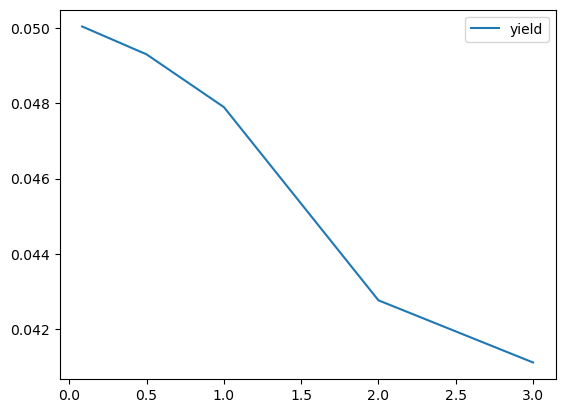

In [43]:
term_structure_df.plot()

# Price Dynamics

<Axes: >

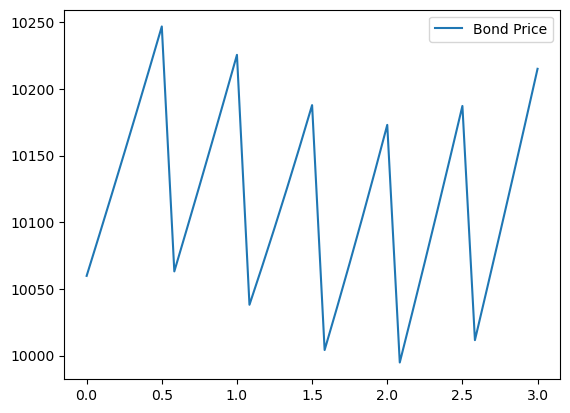

In [44]:
price_df.plot()